## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Thu Jul 16 15:38:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 431.87       Driver Version: 431.87       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX250      WDDM  | 00000000:06:00.0 Off |                  N/A |
| N/A   42C    P8    N/A /  N/A |     64MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""

num_neurons = [512, 256, 128, 128, 128]

def build_mlp(input_shape, output_units=10, num_neurons=num_neurons):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0 :
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290  

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 21ms/step - loss: 1.9240 - accuracy: 0.2933 - val_loss: 1.7628 - val_accuracy: 0.3596
Epoch 2/100
196/196 [==============================] - 4s 20ms/step - loss: 1.7128 - accuracy: 0.3833 - val_loss: 1.6703 - val_accuracy: 0.3953
Epoch 3/100
196/196 [==============================] - 4s 20ms/step - loss: 1.6178 - accuracy: 0.4189 - val_loss: 1.5945 - val_accuracy: 0.4213
Epoch 4/100
196/196 [==============================] - 4s 20ms/step - loss: 1.5534 - accuracy: 0.4452 - val_loss: 1.5218 - val_accuracy: 0.4586
Epoch 5/100
196/196 [==============================] - 4s 21ms/step - loss: 1.5160 - accuracy: 0.4571 - val_loss: 1.5540 - val_accuracy: 0.4591
Epoch 6/100
196/196 [==============================] - 4s 20ms/step - loss: 1.4731 - accuracy: 0.4732 - val_loss: 1.5264 - val_accuracy: 0.4510
Epoch 7/100
196/196 [==============================] - 4s 20ms/step - loss: 1.4374 - accuracy: 0.4859 - val_loss: 1.5060 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 0.5204 - accuracy: 0.8124 - val_loss: 2.2952 - val_accuracy: 0.4986
Epoch 58/100
196/196 [==============================] - 4s 20ms/step - loss: 0.5187 - accuracy: 0.8120 - val_loss: 2.3149 - val_accuracy: 0.5049
Epoch 59/100
196/196 [==============================] - 4s 22ms/step - loss: 0.5000 - accuracy: 0.8198 - val_loss: 2.4883 - val_accuracy: 0.4924
Epoch 60/100
196/196 [==============================] - 4s 22ms/step - loss: 0.4891 - accuracy: 0.8206 - val_loss: 2.3181 - val_accuracy: 0.5024
Epoch 61/100
196/196 [==============================] - 4s 22ms/step - loss: 0.4637 - accuracy: 0.8334 - val_loss: 2.4369 - val_accuracy: 0.5025
Epoch 62/100
196/196 [==============================] - 4s 21ms/step - loss: 0.4700 - accuracy: 0.8288 - val_loss: 2.5503 - val_accuracy: 0.4923
Epoch 63/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4987 - accuracy: 0.8206 - val_loss: 2.4470 - val_accuracy: 0.494

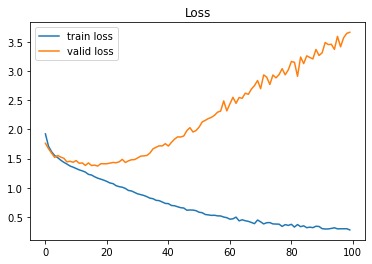

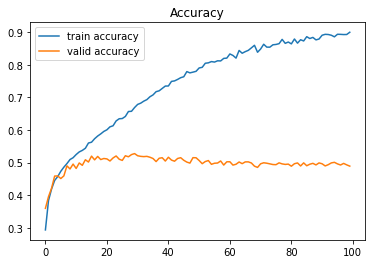

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()